<a href="https://colab.research.google.com/github/LuisRobles18/CSC8850-Advanced-Machine-Learning/blob/main/CSC8850_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Advanced Machine Learning Homework 2 (Problems 3 and 8)**
**Student Name:** Luis Alberto Robles Hernandez    **Student ID:** 002581393

##**Problem 3**

**Problem 3:** Draw probability densities and find the decision regions for the following classes:

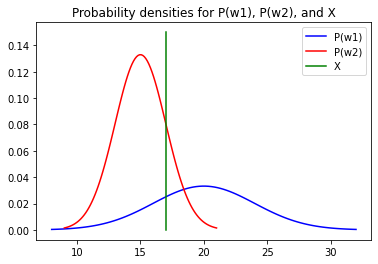

In [ ]:
#Importing the required modules
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt

#Values for mu and sigmna
mu = 20
sigma = 4
#Probability for p(w1)
p_w1 = 1/3
x1 = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x1, p_w1*stats.norm.pdf(x1, mu, sigma), color = "blue", label="P(w1)")
#Values for mu and sigmna
mu = 15
sigma = 2
#Probability for p(w2)
p_w2 = 2/3
x2 = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x2, p_w2*stats.norm.pdf(x2, mu, sigma), color = "red", label="P(w2)")

#Plotting the value of X with a width of 0.05 points
x_coordinates = [17, 17]
y_coordinates = [0, 0.15]
plt.plot(x_coordinates, y_coordinates, color = "green", label="X")
plt.title("Probability densities for P(w1), P(w2), and X")
plt.legend(loc="upper right")
plt.show()


##**Problem 8**

**Problem 8:** Assume that red, green, and blue components of the [black sea bass image found in Wikimedia](https://upload.wikimedia.org/wikipedia/commons/a/a2/Black_sea_bass_at_Gray's_Reef_National_Marine_Sanctuary_in_Georgia.jpg) are sampels of a 3 x 1 vector random variable. Use python to do the following:

In [ ]:
#Importing the required modules for the next excersises 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as plt_img

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

**A) (3 points)** Compute the mean vector and substract it from each of the pixels to produce a color image with zero mean.

In [ ]:
# Answer for question A

#Firstly we obtain the image
sea_bass = plt_img.imread('sea.jpg')

#Then we compute the mean vector
mean_vector = np.mean(sea_bass, axis=(0,1))
#After, we compute the zero mean from the sea bass image
zero_mean_image = sea_bass - mean_vector

**B) (3 points)** Show the image

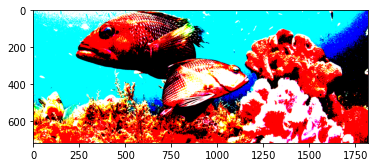

In [ ]:
#We show the resulting image from question A
plt.imshow(zero_mean_image)
plt.show()

**C) (3 points)** Compute the 3 x 3 covariance matrix for the zero mean image.

In [ ]:
#We call the T parameter to get the transpose of the matrix
covariance_temp = np.reshape(zero_mean_image,(-1,3)).T
#Finally, we compute the covariance matrix by calling the covariance function from NumPy
covariance_matrix = np.cov(covariance_temp)

print('Covariance matrix: \n')
print(covariance_matrix)

Covariance matrix: 

[[3754.82515044  170.94792396 -156.21326868]
 [ 170.94792396 2204.07591359 2239.1358342 ]
 [-156.21326868 2239.1358342  2467.28521105]]


**D) (3 points)** Compute the eigenvectors and eigenvalues of the covariance matrix.

In [ ]:
#There is a function from NumPy in which we can obtain both results by calling the eig function
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

print('Eigenvalues of the covariance matrix: \n')
print(eigenvalues)
print('Eigenvectors of the covariance matrix (for each eigenvalue): \n')
print(eigenvectors)

Eigenvalues of the covariance matrix: 

[  78.09891199 3769.39060234 4578.69676076]
Eigenvectors of the covariance matrix (for each eigenvalue): 

[[-0.06285114  0.99801293  0.00446451]
 [ 0.72615161  0.04266064  0.68620981]
 [-0.68465581 -0.04637098  0.72738996]]


**E) (3 points)** Transform each pixel in the black sea bass image using the matrix of eigenvectors of the covariance matrix (i.e., KL transform)

In [ ]:
#As a first step, we give a new shape to the image array without changing its data.
sea_bass_temp = np.reshape(sea_bass,(3,-1))
karhunen_loeve_transform = np.dot(eigenvectors.T, covariance_temp).T
transformed_image = np.reshape(karhunen_loeve_transform, sea_bass.shape)

**F) (3 points)** Display the transformed image.

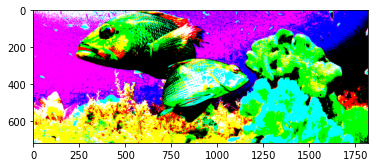

In [ ]:
#We show the transformed image using the matrix of eigenvectors of the covariance matrix
plt.imshow(transformed_image)
plt.show()

**G) (3 points)** Display the red, green, and blue components of the transformed image.

Text(0.5, 1.0, 'Blue component of the transformed image')

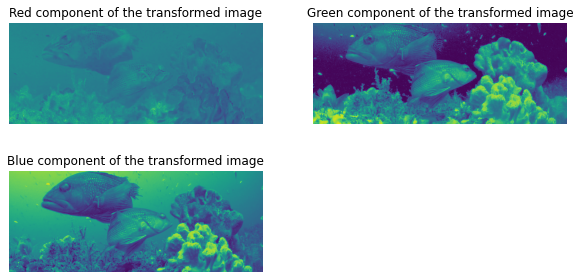

In [ ]:
#Create the figure
fig = plt.figure(figsize=(10, 5))

#The figure will contain a matrix of 2x2 images
rows = 2
columns = 2

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(transformed_image[:,:,0])
plt.axis('off')
plt.title("Red component of the transformed image")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(transformed_image[:,:,1])
plt.axis('off')
plt.title("Green component of the transformed image")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(transformed_image[:,:,2])
plt.axis('off')
plt.title("Blue component of the transformed image")

**H) (4 points)** Show that the covariance matrix of the transformed image is diagonal. Show that the variances are equal to the eigenvalues of the original covariance matrix.

In [ ]:
#We do the same from exercise C, but this time using the KL transformed image
transformed_image_temp = np.reshape(transformed_image,(-1,3)).T
#Finally, we compute the covariance matrix by calling the covariance function from NumPy
covariance_matrix_kl = np.cov(transformed_image_temp)
#Remove scientific notatiom
np.set_printoptions(suppress=True)
print('Covariance matrix of the KL transformed image: \n')
print(covariance_matrix_kl)

Covariance matrix of the KL transformed image: 

[[  78.09891199   -0.            0.        ]
 [  -0.         3769.39060234   -0.        ]
 [   0.           -0.         4578.69676076]]
